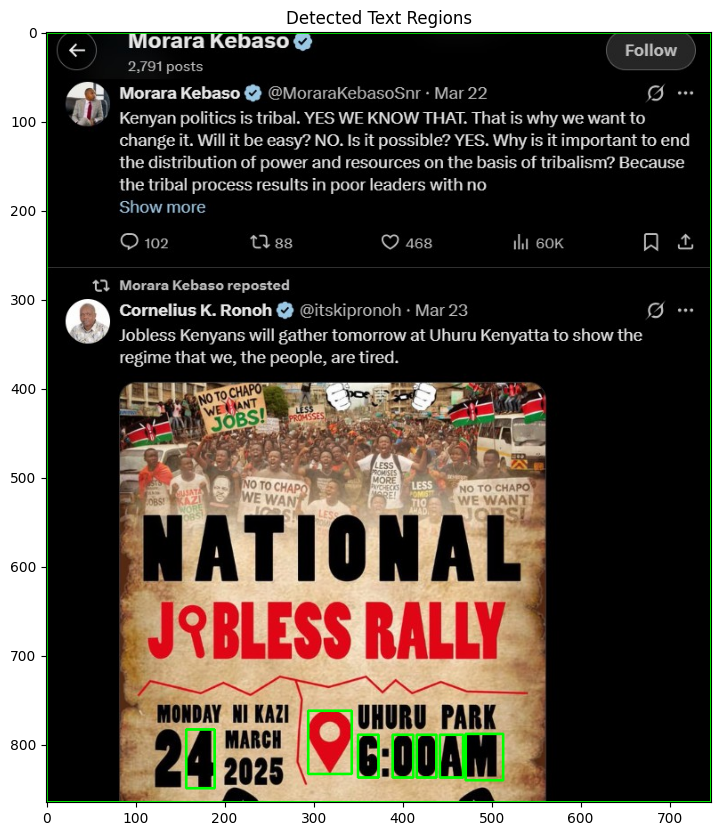

Total Text Groups Detected: 2
Total Words Counted: 121
Word Count per Text Group:

Group 1 (2 words):
ran

ed

Group 2 (119 words):
(<) MoraraKebaso@ ( Follow
el 2,791 posts x d
), Morara Kebaso @ @MoraraKebasoSnr - Mar 22 Bove

Kenyan politics is tribal. YES WE KNOW THAT. That is why we want to
change it. Will it be easy? NO. Is it possible? YES. Why is it important to end
the distribution of power and resources on the basis of tribalism? Because
the tribal process results in poor leaders with no

Show more

O 102 tes O° 468 lt 60K As

12 Morara Kebaso reposted

Q Cornelius K. Ronoh @ @itskipronoh - Mar 23 Your
Jobless Kenyans will gather tomorrow at Uhuru Kenyatta to show the
regime that we, the people, are tired.

“MONDAY NI KAZI UHURU PARK

24m: 96:00AM.


In [11]:
import cv2
import os
import pytesseract
import matplotlib.pyplot as plt
import numpy as np

# Set Tesseract path
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Update for your OS

def document_scanner(image_path):
    # Load image with validation
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found: {image_path}")
    
    # Preprocessing
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Process text regions
    processed_img = img.copy()
    all_text = []
    word_counts = []

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w * h > 1000:  # Minimum area threshold
            # Draw bounding box
            cv2.rectangle(processed_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            
            # OCR processing
            roi = img[y:y+h, x:x+w]
            text = pytesseract.image_to_string(roi).strip()
            
            # Word count logic
            if text:
                words = text.split()
                word_counts.append(len(words))
                all_text.append(text)

    # Visualization
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB))
    plt.title('Detected Text Regions')
    plt.show()

    # Display results
    print("="*50)
    print(f"Total Text Groups Detected: {len(word_counts)}")
    print(f"Total Words Counted: {sum(word_counts)}")
    print("Word Count per Text Group:")
    for i, (count, text) in enumerate(zip(word_counts, all_text)):
        print(f"\nGroup {i+1} ({count} words):")
        print(text)
    print("="*50)

# Usage
document_scanner("scan3.jpg")